In [1]:
# Step 1: Import Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import shap

# Optional: Set visualization styles
sns.set(style='whitegrid')


In [7]:
# If the file is on your local system, provide the full or relative path to the file
df = pd.read_csv("C:\\Users\delli\OneDrive\Desktop\ibmdataset.csv")
df.head()






,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

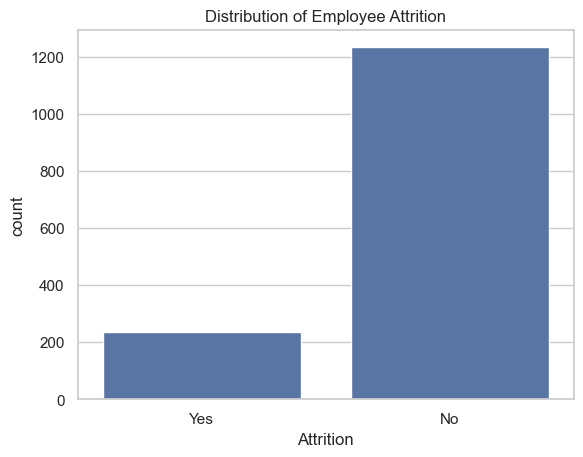

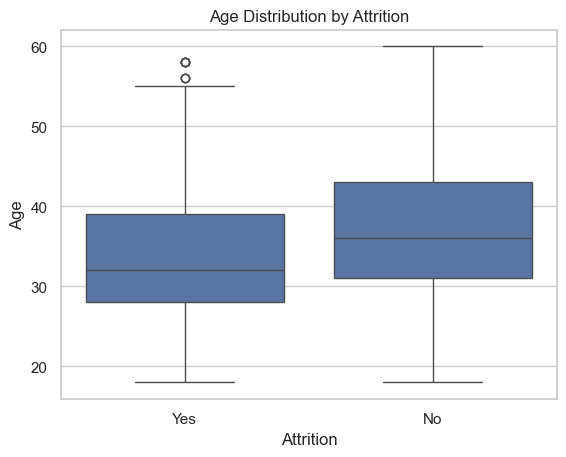

ValueError: could not convert string to float: 'Yes'

<Figure size 1200x800 with 0 Axes>

In [8]:
# Step 3: Exploratory Data Analysis (EDA)

# Basic info
df.info()

# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

# Summary statistics
df.describe()

# Distribution of target variable 'Attrition'
sns.countplot(x='Attrition', data=df)
plt.title('Distribution of Employee Attrition')
plt.show()

# Visualize key features
# Example: Age distribution by Attrition
sns.boxplot(x='Attrition', y='Age', data=df)
plt.title('Age Distribution by Attrition')
plt.show()

# Correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


In [9]:
# Step 4: Data Preprocessing

# Encode categorical variables
categorical_cols = df.select_dtypes(include=['object']).columns

# Convert categorical variables to dummy variables
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Encode target variable 'Attrition' (Yes/No) to 1/0
df_encoded['Attrition'] = df_encoded['Attrition'].map({'Yes':1, 'No':0})

# Define features and target
X = df_encoded.drop('Attrition', axis=1)
y = df_encoded['Attrition']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


KeyError: 'Attrition'

In [10]:
# Step 5: Model Training

# Option 1: Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluation
print('Random Forest Accuracy:', accuracy_score(y_test, y_pred_rf))
print('Classification Report:\n', classification_report(y_test, y_pred_rf))


NameError: name 'X_train' is not defined